In [1]:
import pandas as pd # библиотека для обработки данных
import seaborn as sns # визуализация данных
import numpy as np
import matplotlib.pyplot as plt # визуализация данных
import scipy.stats as stats
%matplotlib inline

from sklearn import preprocessing # Предварительная обработка данных
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV #
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor # XGBoost регрессор
from sklearn.linear_model import LinearRegression #  Линейная регрессия
from sklearn.linear_model import Lasso #  LASSO
from sklearn.linear_model import Ridge #  Ridge
from sklearn.linear_model import ElasticNet #  ElasticNet
from sklearn.tree import DecisionTreeRegressor #  Дерево решений для регрессии
from sklearn.ensemble import GradientBoostingRegressor

Предобработка

In [2]:
data = pd.read_csv('listings.csv')
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,4826,The Place,6603,Kaan,NaN,Uskudar,41.05650,29.05367,Entire home/apt,720,1,1,2009-06-01,0.01,1,365
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,NaN,Besiktas,41.06984,29.04545,Entire home/apt,816,365,41,2018-11-07,0.33,2,279
2,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,NaN,Beyoglu,41.03254,28.98153,Entire home/apt,233,30,13,2018-05-04,0.19,1,289
3,28277,Duplex Apartment with Terrace,121607,Alen,NaN,Sisli,41.04471,28.98567,Hotel room,761,3,0,NaN,NaN,19,365
4,28318,Cosy home overlooking Bosphorus,121721,Aydin,NaN,Sariyer,41.09048,29.05559,Entire home/apt,823,3,0,NaN,NaN,1,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23723,43963636,Avcılarda özel oda,297895734,Aykhan,NaN,Avcilar,40.97870,28.72668,Private room,171,1,0,NaN,NaN,2,175
23724,43966333,1+1 LUXURY RESIDENCEIN MASLAK HYGIENE CERTIFIC...,69089629,Metin,NaN,Sisli,41.11798,29.00886,Entire home/apt,597,1,0,NaN,NaN,15,363
23725,43966442,The Rooms In Beyoğlu,286090194,Seyfulla,NaN,Beyoglu,41.03839,28.98831,Private room,144,1,0,NaN,NaN,7,210
23726,43967082,Istanbul dream apartement,288314755,Adil,NaN,Esenyurt,41.01065,28.67427,Entire home/apt,603,2,0,NaN,NaN,1,90


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23728 entries, 0 to 23727
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              23728 non-null  int64  
 1   name                            23674 non-null  object 
 2   host_id                         23728 non-null  int64  
 3   host_name                       23727 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   23728 non-null  object 
 6   latitude                        23728 non-null  float64
 7   longitude                       23728 non-null  float64
 8   room_type                       23728 non-null  object 
 9   price                           23728 non-null  int64  
 10  minimum_nights                  23728 non-null  int64  
 11  number_of_reviews               23728 non-null  int64  
 12  last_review                     

In [4]:
data.drop(columns=['id', 'name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'last_review', 'reviews_per_month'], inplace = True)
data


,host_id,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,6603,41.05650,29.05367,Entire home/apt,720,1,1,1,365
1,78838,41.06984,29.04545,Entire home/apt,816,365,41,2,279
2,117026,41.03254,28.98153,Entire home/apt,233,30,13,1,289
3,121607,41.04471,28.98567,Hotel room,761,3,0,19,365
4,121721,41.09048,29.05559,Entire home/apt,823,3,0,1,88
...,...,...,...,...,...,...,...,...,...
23723,297895734,40.97870,28.72668,Private room,171,1,0,2,175
23724,69089629,41.11798,29.00886,Entire home/apt,597,1,0,15,363
23725,286090194,41.03839,28.98831,Private room,144,1,0,7,210
23726,288314755,41.01065,28.67427,Entire home/apt,603,2,0,1,90


In [5]:
data = pd.get_dummies(data, columns=['room_type'], drop_first=True)
data

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,6603,41.05650,29.05367,720,1,1,1,365,0,0,0
1,78838,41.06984,29.04545,816,365,41,2,279,0,0,0
2,117026,41.03254,28.98153,233,30,13,1,289,0,0,0
3,121607,41.04471,28.98567,761,3,0,19,365,1,0,0
4,121721,41.09048,29.05559,823,3,0,1,88,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
23723,297895734,40.97870,28.72668,171,1,0,2,175,0,1,0
23724,69089629,41.11798,29.00886,597,1,0,15,363,0,0,0
23725,286090194,41.03839,28.98831,144,1,0,7,210,0,1,0
23726,288314755,41.01065,28.67427,603,2,0,1,90,0,0,0


In [6]:
Dup_Rows = data[data.duplicated()]
Dup_Rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 3938 to 18303
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         39 non-null     int64  
 1   latitude                        39 non-null     float64
 2   longitude                       39 non-null     float64
 3   price                           39 non-null     int64  
 4   minimum_nights                  39 non-null     int64  
 5   number_of_reviews               39 non-null     int64  
 6   calculated_host_listings_count  39 non-null     int64  
 7   availability_365                39 non-null     int64  
 8   room_type_Hotel room            39 non-null     uint8  
 9   room_type_Private room          39 non-null     uint8  
 10  room_type_Shared room           39 non-null     uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 2.9 KB


In [7]:
data.drop_duplicates(keep='first', inplace = True)

In [8]:
Dup_Rows = data[data.duplicated()]
Dup_Rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         0 non-null      int64  
 1   latitude                        0 non-null      float64
 2   longitude                       0 non-null      float64
 3   price                           0 non-null      int64  
 4   minimum_nights                  0 non-null      int64  
 5   number_of_reviews               0 non-null      int64  
 6   calculated_host_listings_count  0 non-null      int64  
 7   availability_365                0 non-null      int64  
 8   room_type_Hotel room            0 non-null      uint8  
 9   room_type_Private room          0 non-null      uint8  
 10  room_type_Shared room           0 non-null      uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 0.0 bytes


In [9]:
data.isnull().sum() #сколько пропущенных значений

host_id                           0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
room_type_Hotel room              0
room_type_Private room            0
room_type_Shared room             0
dtype: int64

In [10]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(10981, 11)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10981 entries, 0 to 23725
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         10981 non-null  int64  
 1   latitude                        10981 non-null  float64
 2   longitude                       10981 non-null  float64
 3   price                           10981 non-null  int64  
 4   minimum_nights                  10981 non-null  int64  
 5   number_of_reviews               10981 non-null  int64  
 6   calculated_host_listings_count  10981 non-null  int64  
 7   availability_365                10981 non-null  int64  
 8   room_type_Hotel room            10981 non-null  uint8  
 9   room_type_Private room          10981 non-null  uint8  
 10  room_type_Shared room           10981 non-null  uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 804.3 KB


In [12]:
data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_Hotel room,room_type_Private room,room_type_Shared room
count,1.098100e+04,10981.000000,10981.000000,10981.000000,10981.000000,10981.000000,10981.000000,10981.000000,10981.0,10981.000000,10981.0
mean,1.569803e+08,41.033320,28.996106,268.982971,1.656133,1.317913,2.536654,214.448411,0.0,0.579638,0.0
std,1.174309e+08,0.028359,0.031853,190.518364,1.059245,2.296810,2.461516,149.312521,0.0,0.493640,0.0
min,6.603000e+03,40.955380,28.903490,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0
25%,3.707117e+07,41.012220,28.977540,123.000000,1.000000,0.000000,1.000000,88.000000,0.0,0.000000,0.0
50%,1.574138e+08,41.034670,28.986370,206.000000,1.000000,0.000000,1.000000,180.000000,0.0,1.000000,0.0
75%,2.675167e+08,41.051260,29.017590,357.000000,2.000000,2.000000,3.000000,365.000000,0.0,1.000000,0.0
max,3.521082e+08,41.113680,29.090000,905.000000,6.000000,10.000000,11.000000,365.000000,0.0,1.000000,0.0


<AxesSubplot:>

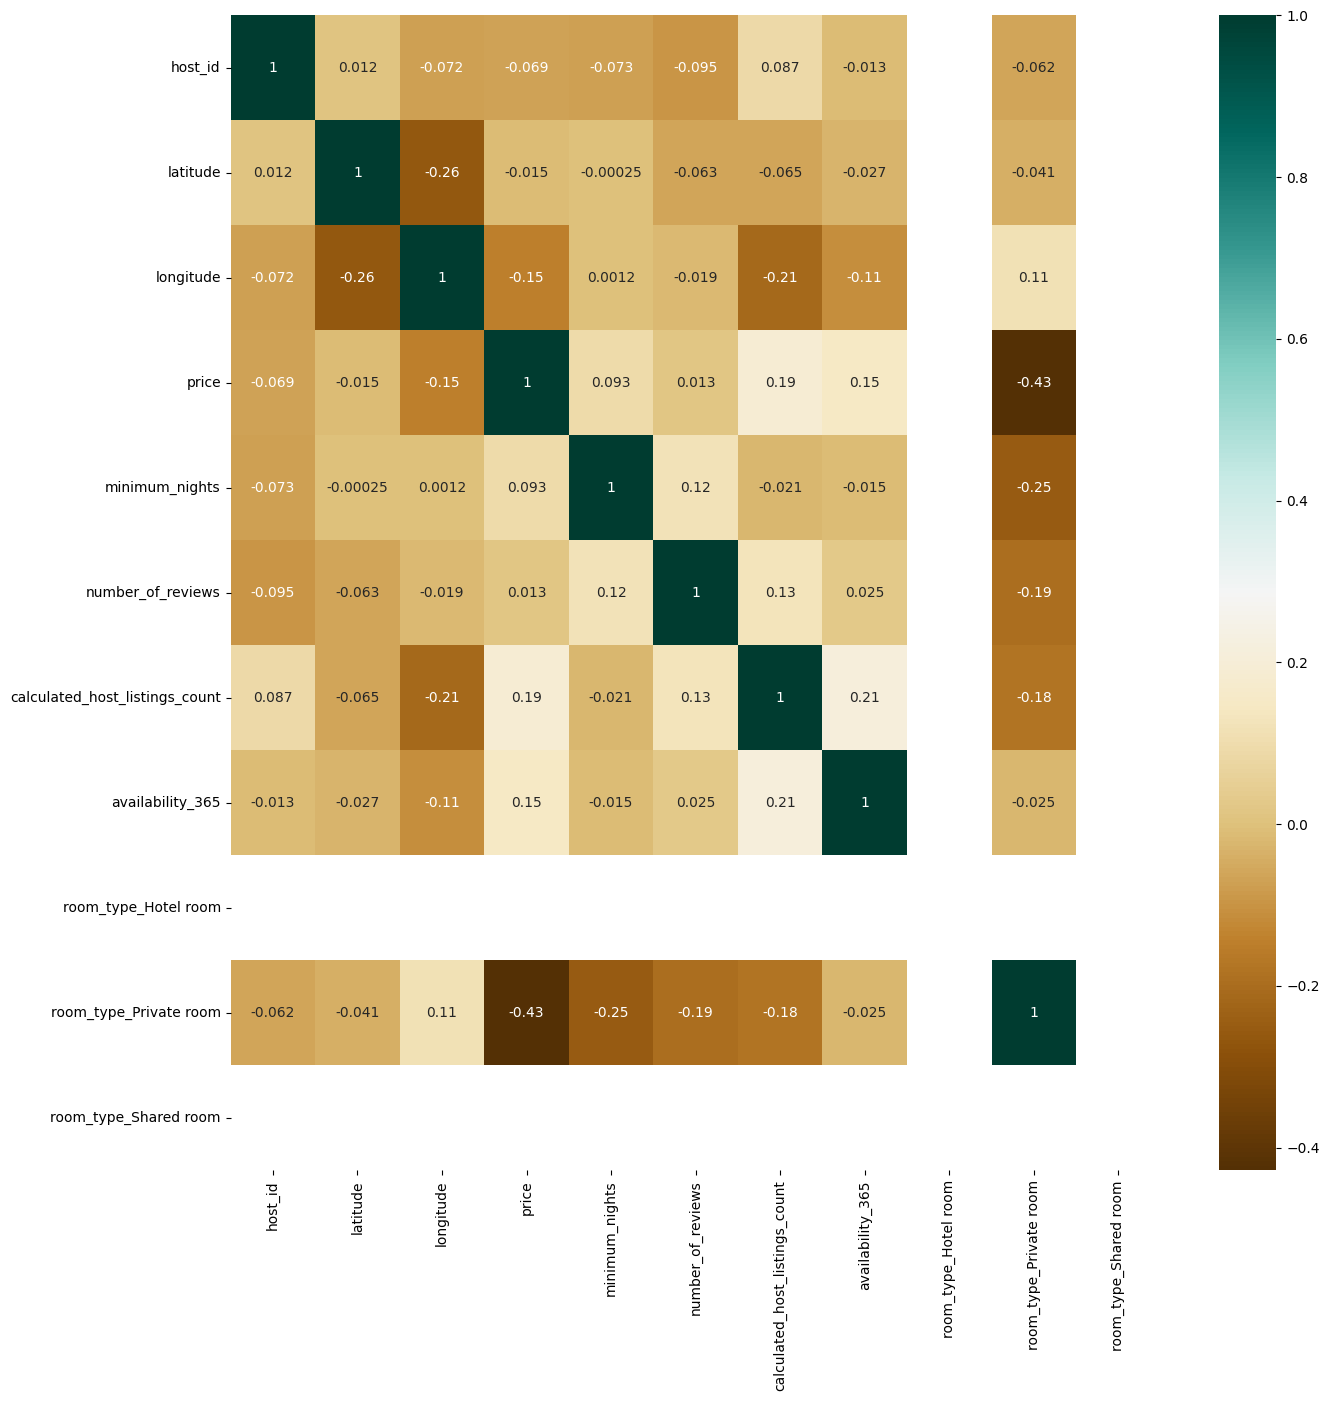

In [13]:
plt.figure(figsize=(15,15))
c= data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

array([[<AxesSubplot:title={'center':'host_id'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>],
       [<AxesSubplot:title={'center':'calculated_host_listings_count'}>,
        <AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:title={'center':'room_type_Hotel room'}>],
       [<AxesSubplot:title={'center':'room_type_Private room'}>,
        <AxesSubplot:title={'center':'room_type_Shared room'}>,
        <AxesSubplot:>]], dtype=object)

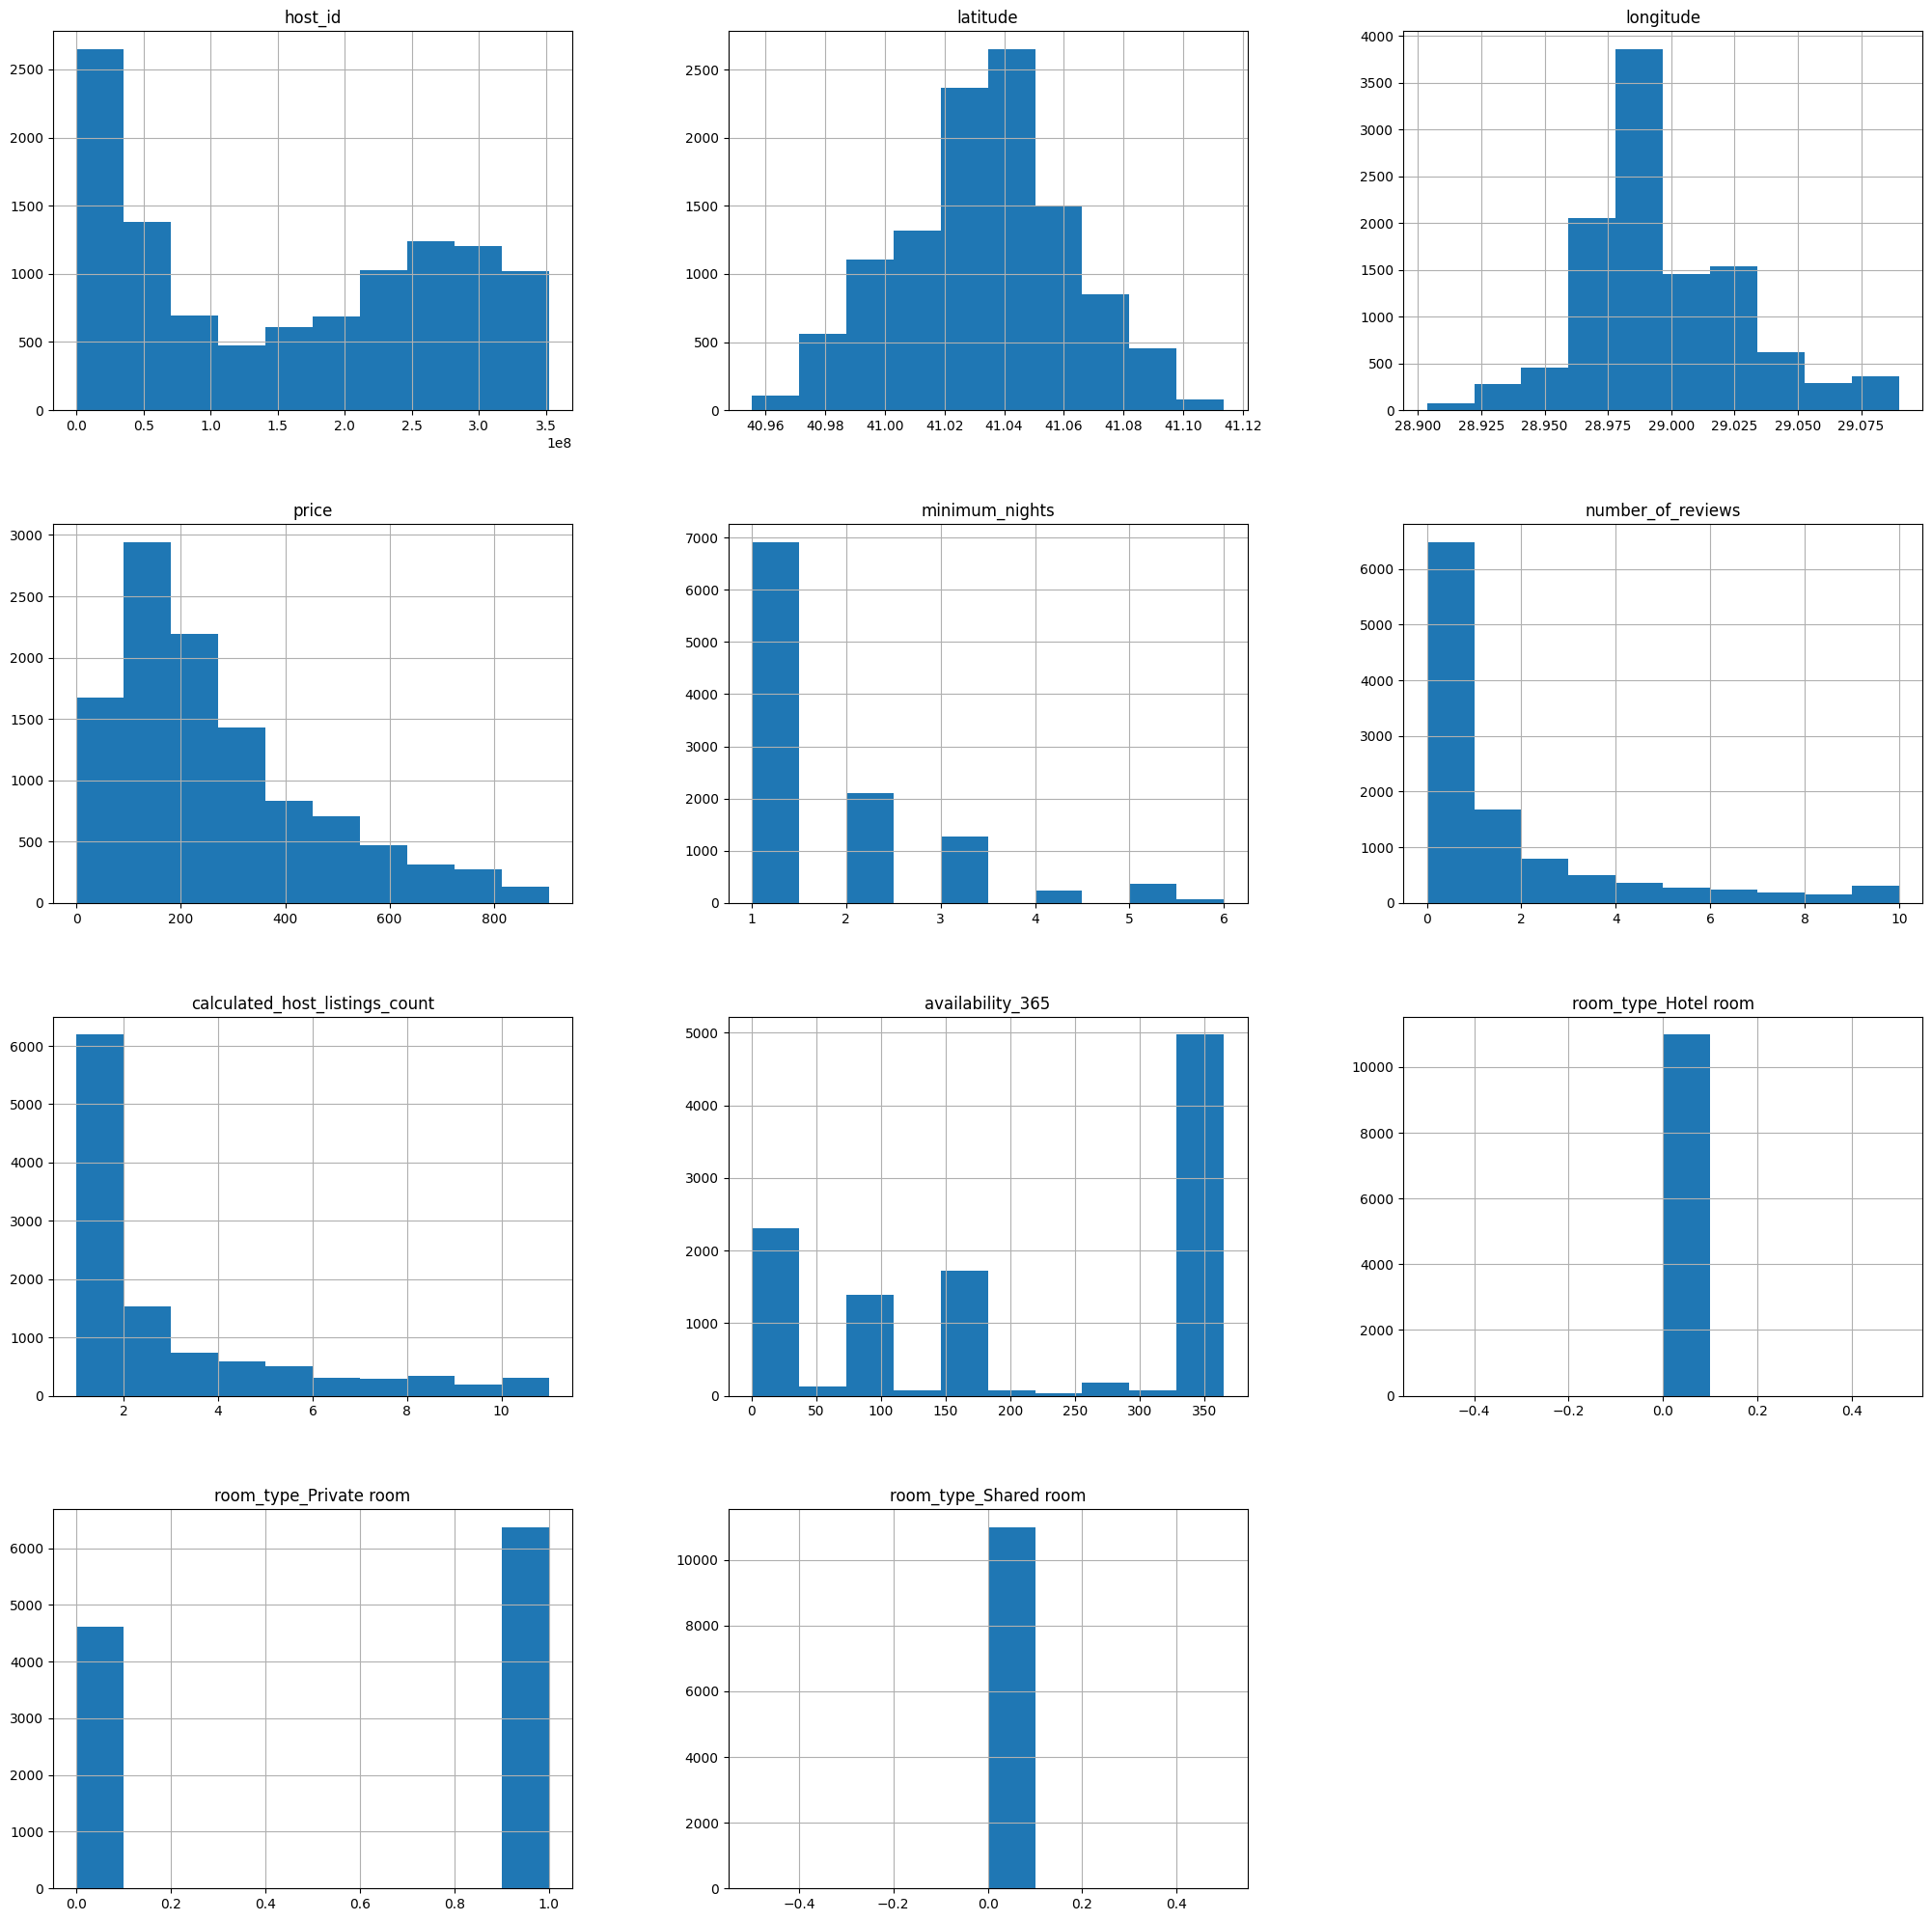

In [14]:
data.hist(figsize = (25, 25), grid = True)

<AxesSubplot:xlabel='latitude'>

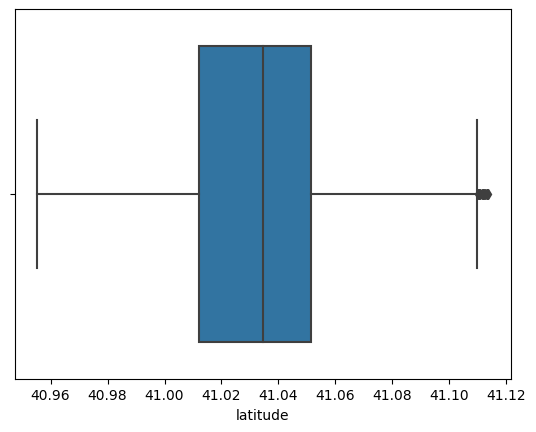

In [15]:
sns.boxplot(x=data['latitude'])

<AxesSubplot:xlabel='longitude'>

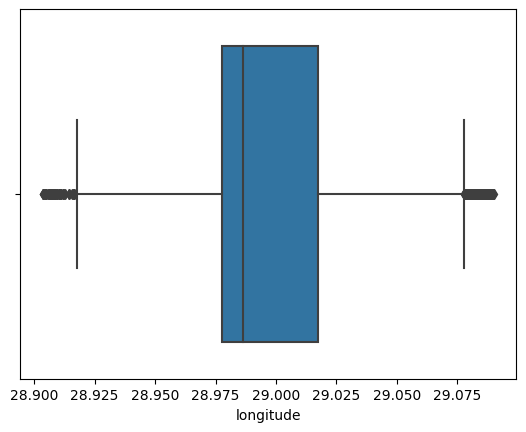

In [16]:
sns.boxplot(x=data['longitude'])

<AxesSubplot:xlabel='minimum_nights'>

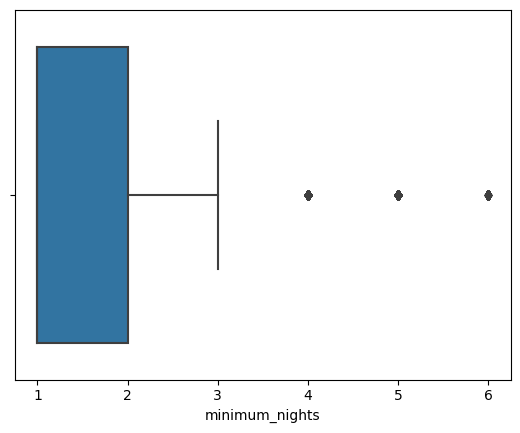

In [17]:
sns.boxplot(x=data['minimum_nights'])

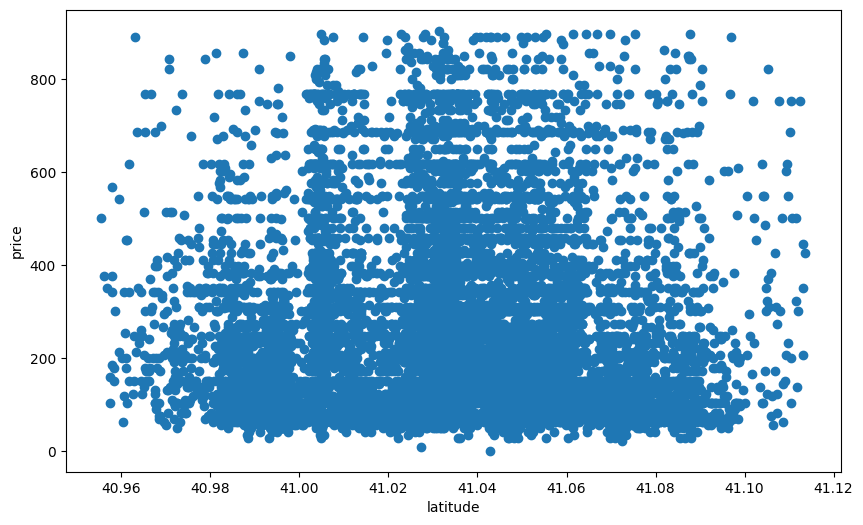

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y=data['price'],x=data['latitude'])
ax.set_xlabel('latitude')
ax.set_ylabel('price')
plt.show()

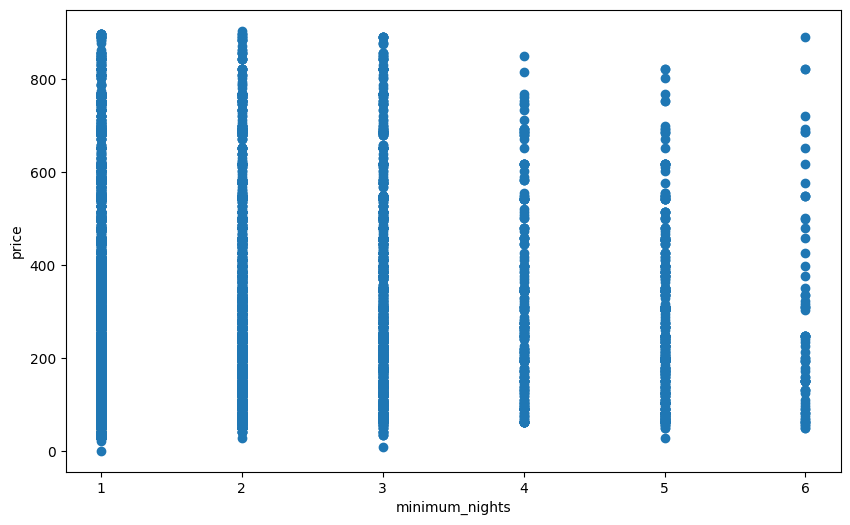

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y=data['price'],x=data['minimum_nights'])
ax.set_xlabel('minimum_nights')
ax.set_ylabel('price')
plt.show()

Обучение регрессии

In [20]:
X = data.drop('price', axis = 1)
y = data.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Линейная регрессия

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)
LR_y_pred = lr.predict(X_test)

In [22]:
r2_score(y_test,LR_y_pred)

0.24549301194426854

In [23]:
mean_absolute_error(y_test,LR_y_pred)

123.30684609378108

In [24]:
mean_squared_error(y_test,LR_y_pred)

25881.79641123649

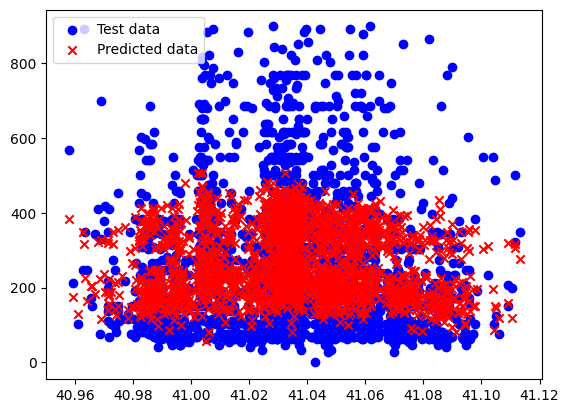

In [25]:
plt.scatter(X_test["latitude"],  y_test ,
            c='blue', marker='o', label='Test data')
plt.scatter(X_test["latitude"],  LR_y_pred ,
            c='red', marker='x', label='Predicted data')
plt.legend(loc='upper left')

Дерево решений

In [26]:
dtr = DecisionTreeRegressor()
dt_params = {
    'criterion': ['squared_error' , 'friedman_mse', 'absolute_error'],
    'max_depth': [30, 40, 50, 65, 80],
    'min_samples_split': range(2, 6, 2),
    'min_samples_leaf': range(1, 5, 2)
}
dt_grid = GridSearchCV(dtr, dt_params, n_jobs=-1, cv = 5)
dt_grid.fit(X_train, y_train)
dt_best = dt_grid.best_estimator_
dt_best.get_params()

DTR_y_pred = dt_best.predict(X_test)

In [27]:
r2_score(y_test,DTR_y_pred)

-0.08650360510473298

In [28]:
mean_absolute_error(y_test,DTR_y_pred)

139.56668183887118

In [29]:
mean_squared_error(y_test,DTR_y_pred)

37270.25137283163

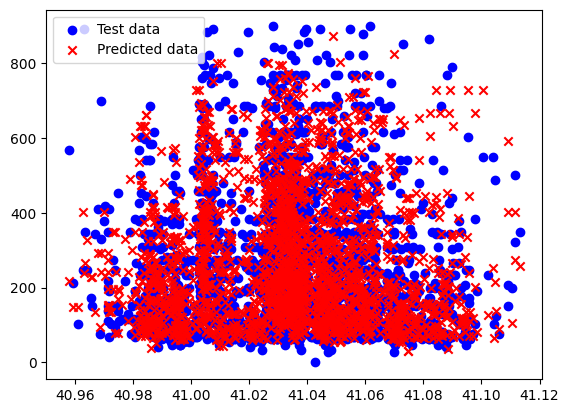

In [30]:
plt.scatter(X_test["latitude"],  y_test ,
            c='blue', marker='o', label='Test data')
plt.scatter(X_test["latitude"],  DTR_y_pred ,
            c='red', marker='x', label='Predicted data')
plt.legend(loc='upper left')

LASSO

In [31]:
lasso = Lasso()
lasso_params = {
    'alpha': [0.01, 0.1, 0.5, 1, 2],
    'max_iter': [500, 1000, 2000, 3000]
}
lasso_grid = GridSearchCV(lasso, lasso_params, n_jobs=-1, cv = 5)
lasso_grid.fit(X_train, y_train)
lasso_best = lasso_grid.best_estimator_
lasso_best.get_params()

LASSO_y_pred = lasso_best.predict(X_test)

In [32]:
r2_score(y_test,LASSO_y_pred)

0.2454099739372585

In [33]:
mean_absolute_error(y_test,LASSO_y_pred)

123.3237374636442

In [34]:
mean_squared_error(y_test,LASSO_y_pred)

25884.64485773977

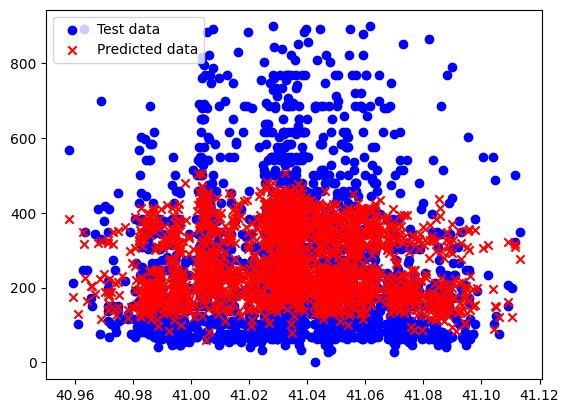

In [35]:
plt.scatter(X_test["latitude"],  y_test ,
            c='blue', marker='o', label='Test data')
plt.scatter(X_test["latitude"],  LASSO_y_pred ,
            c='red', marker='x', label='Predicted data')
plt.legend(loc='upper left')

Ридж-регрессия

In [36]:
ridge = Ridge()
ridge_params = {
    'alpha': [0.01, 0.1, 0.5, 1, 2],
    'solver' : ['svd', 'cholesky', 'sag', 'saga']
}

ridge_grid = GridSearchCV(ridge, ridge_params, n_jobs=-1, cv = 5)
ridge_grid.fit(X_train, y_train)
ridge_best = ridge_grid.best_estimator_
ridge_best.get_params()

Ridge_y_pred = ridge_best.predict(X_test)

In [37]:
r2_score(y_test,Ridge_y_pred)

0.24544682260482353

In [38]:
mean_absolute_error(y_test,Ridge_y_pred)

123.31547526066872

In [39]:
mean_squared_error(y_test,Ridge_y_pred)

25883.380840670296

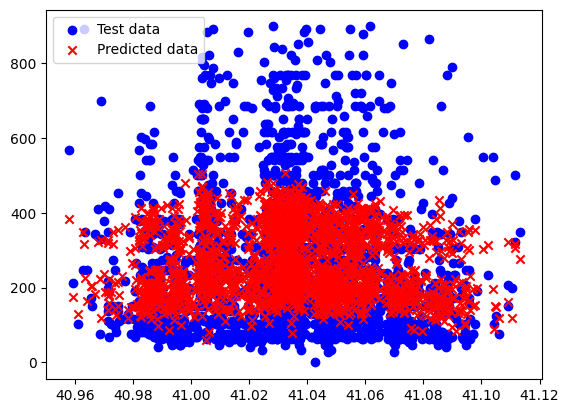

In [40]:
plt.scatter(X_test["latitude"],  y_test ,
            c='blue', marker='o', label='Test data')
plt.scatter(X_test["latitude"],  Ridge_y_pred ,
            c='red', marker='x', label='Predicted data')
plt.legend(loc='upper left')

XGBoost

In [41]:
xgboost_params = {
    "n_estimators": [100, 150, 200],
    "max_depth": [10, 15],
    "min_samples_split": [2, 5],
    "learning_rate": [0.01, 0.1],
    "loss": ["squared_error"],
    "max_features": ['auto', 'sqrt', 'log2']
}

gsc = GridSearchCV(
    estimator = GradientBoostingRegressor(),
    param_grid = xgboost_params,
    cv=4, n_jobs=-1)

fit=gsc.fit(X_train, y_train)

xgb = fit.best_estimator_

XGB_y_pred = xgb.predict(X_test)

In [42]:
r2_score(y_test,XGB_y_pred)

0.3662236770093956

In [43]:
mean_absolute_error(y_test,XGB_y_pred)

110.67449248424909

In [44]:
mean_squared_error(y_test,XGB_y_pred)

21740.381496232425

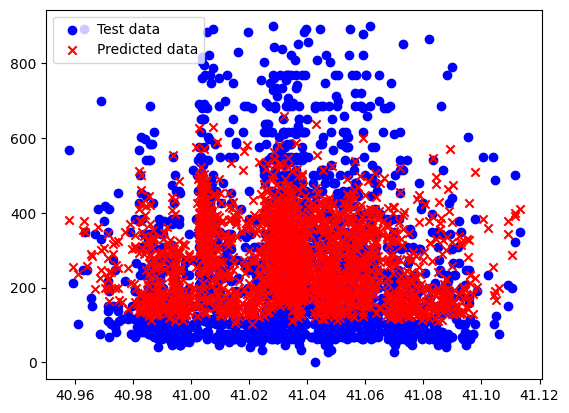

In [45]:
plt.scatter(X_test["latitude"],  y_test ,
            c='blue', marker='o', label='Test data')
plt.scatter(X_test["latitude"],  XGB_y_pred ,
            c='red', marker='x', label='Predicted data')
plt.legend(loc='upper left')

ElasticNet

In [51]:
EN = ElasticNet()
elastic_net_params = {
    'alpha': [0.01, 0.1, 0.5, 1, 2],
}

elastic_net_grid = GridSearchCV(EN, elastic_net_params, n_jobs=-1, cv = 5)
elastic_net_grid.fit(X_train, y_train)
elastic_net_best = elastic_net_grid.best_estimator_
elastic_net_best.get_params()

EN_y_pred = elastic_net_best.predict(X_test)

In [52]:
r2_score(y_test,EN_y_pred)

0.23613280535175374

In [53]:
mean_absolute_error(y_test,EN_y_pred)

124.54582831277807

In [54]:
mean_squared_error(y_test,EN_y_pred)

26202.87887333383

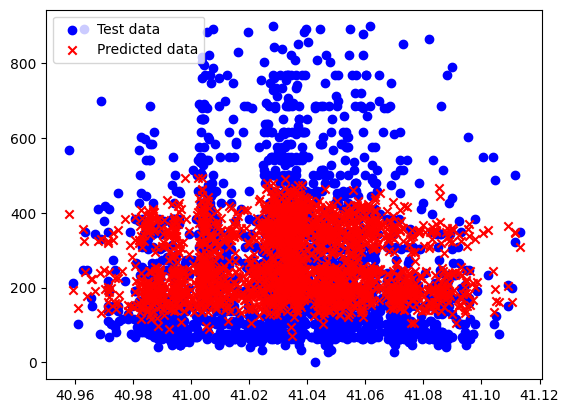

In [55]:
plt.scatter(X_test["latitude"],  y_test ,
            c='blue', marker='o', label='Test data')
plt.scatter(X_test["latitude"],  EN_y_pred ,
            c='red', marker='x', label='Predicted data')
plt.legend(loc='upper left')